Initial dataset preview:
   game_id  episode  act       rank       date      agent     map outcome  \
0        1        6    2  Placement  4/11/2023     Cypher  Ascent    Loss   
1        2        6    2  Placement  4/12/2023     Cypher  Icebox    Loss   
2        3        6    2  Placement  4/15/2023      KAY/O   Lotus     Win   
3        4        6    2  Placement  4/15/2023  Brimstone  Ascent    Loss   
4        5        6    2  Placement  4/15/2023     Cypher   Haven    Loss   

   round_wins  round_losses  kills  deaths  assists  kdr  avg_dmg_delta  \
0           5            13      8      15        4  0.5            -61   
1           4            13      3      15        2  0.2           -124   
2          13             4      7      12        7  0.6            -46   
3           9            13     18      12       10  1.5             23   
4           1            13      6      14        3  0.4            -75   

   headshot_pct  avg_dmg  acs  num_frag  
0             3    

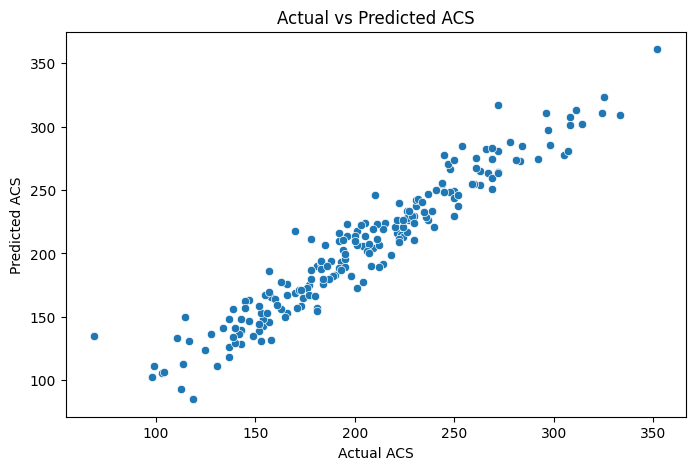

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, confusion_matrix, classification_report

# Load dataset
df = pd.read_csv("valorant_games.csv")  # Replace with an actual dataset

# Data Preprocessing
print("Initial dataset preview:")
print(df.head())

# Handle missing values - Only apply mean to numeric columns
df.fillna(df.select_dtypes(include=np.number).mean(), inplace=True)

# Encode categorical variables if necessary
categorical_cols = ['episode', 'act', 'rank', 'date', 'agent', 'map', 'outcome']
df = pd.get_dummies(df, columns=categorical_cols, drop_first=True)

# Define features and target variable
X = df.drop("acs", axis=1)  # Assuming "acs" is the target variable, change if needed
y = df["acs"]

# Split dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Model Selection and Training
model = LinearRegression()
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)

# Model Evaluation
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred) * 100  # Convert to percentage

print(f"Model Accuracy (R² Score): {r2:.2f}%")
print(f"Mean Absolute Error: {mae}")
print(f"Mean Squared Error: {mse}")
print(f"Root Mean Squared Error: {rmse}")

# Display Sample Actual vs Predicted Values
sample_actual = np.round(y_test[:5].values, 2)
sample_predicted = np.round(y_pred[:5], 2)
print("\nPredicted ACS:", sample_predicted)
print("Actual ACS:", sample_actual)

# Confusion-Matrix-Like Interpretation for Regression
threshold = 20  # Define acceptable error range
y_test_class = (np.abs(y_test - y_pred) < threshold).astype(int)
y_pred_class = np.ones_like(y_test_class)  # All predictions are assumed correct initially
cm = confusion_matrix(y_test_class, y_pred_class)

print("\nConfusion Matrix (Based on Error Threshold of ±20 ACS):\n", cm)
print("\nPerformance Metrics:")
print(f"Accuracy: {np.trace(cm) / np.sum(cm) * 100:.2f}%")
print(f"Precision: {cm[1, 1] / (cm[1, 1] + cm[0, 1]):.2f}")
print(f"Recall: {cm[1, 1] / (cm[1, 1] + cm[1, 0]):.2f}")
print(f"F1 Score: {2 * (cm[1, 1] / (cm[1, 1] + cm[0, 1]) * cm[1, 1] / (cm[1, 1] + cm[1, 0])) / (cm[1, 1] / (cm[1, 1] + cm[0, 1]) + cm[1, 1] / (cm[1, 1] + cm[1, 0])):.2f}")

# Visualizing results
plt.figure(figsize=(8,5))
sns.scatterplot(x=y_test, y=y_pred)
plt.xlabel("Actual ACS")
plt.ylabel("Predicted ACS")
plt.title("Actual vs Predicted ACS")
plt.show()

# Iteration: Hyperparameter tuning or model selection can be done based on results

